In [2]:
!pip install -r requirements.txt

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Using cached matlab-0.1-py3-none-any.whl
  Using cached matplotlib-3.3.4-cp39-cp39-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached Pillow-8.1.0-cp39-cp39-macosx_10_10_x86_64.whl (2.2 MB)
  Using cached scikit_learn-0.24.1-cp39-cp39-macosx_10_13_x86_64.whl (7.3 MB)
  Using cached scipy-1.6.0-cp39-cp39-macosx_10_9_x86_64.whl (30.9 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-macosx_10_5_x86_64.macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.whl (613 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [3]:
import numpy as np
import IPython
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as color
import soundfile
import scipy.signal as sig
import sklearn

import math
import os
from os import listdir
import scipy.signal as sig
from os.path import isfile, join
import random
from sklearn.decomposition import PCA
import sklearn
from sklearn import mixture



import scipy.io as spio

Fpy = spio.loadmat('Fpy.mat', squeeze_me=True)

In [4]:
F=pd.DataFrame(Fpy['Fpy'])


In [5]:
F.columns=['mean(audio)',
    'var(audio)', 
     'skewness(audio)', 
     'kurtosis(audio)', 
    'peak2peak(audio)', 
  'rms(audio)', 
    'mad(audio)', 
 'csFlowRange', 
   'fPeak', 
   'formant1',
   'formant2',
  'f0max',
  'f0min',
  'f0mean',
  'f0final',
 'pLow', 
  'pMid',
    'pHigh',
    'pKur(1)']

/Users/parrot/Envs/Oxford-AI/CloudEdge/OxfordProject15/feature extraction


In [9]:
list_of_dataframes=[]
X = pd.read_csv('nn_ele_hb_00-24hr_TrainingSet_v2.txt', sep="\t", header=0)
for file_path in listdir('/Users/parrot/Envs/Oxford-AI/CloudEdge/OxfordProject15/datafiles'): 
    ref_table=X[X['filename']==file_path]
    list_of_dataframes.append(ref_table.reset_index().drop('index',axis=1).join(F))

In [10]:
F=pd.concat(list_of_dataframes)

In [11]:
F=F.drop(['marginals',"Selection"],axis=1)

In [12]:
np.unique(F["filename"])

array(['nn01a_20180126_000000.wav', 'nn05e_20180504_000000.wav',
       'nn05e_20181021_000000.wav', 'nn06a_20180716_000000.wav',
       'nn06d_20180311_000000.wav', 'nn06e_20190128_000000.wav'],
      dtype=object)

## Features Table 

## Let's Label our Data based on Maturity Group ( Method 1 using Literature Thresholds)

In [13]:
thresholds = {'Maturity Group 1': [84.74,23.53,15.41,11.11,11.91],
        'Maturity Group 2': [96.83,26.14,15.06,10.9,11.30] }


In [14]:
thresholds=pd.DataFrame(thresholds,
    index=['Formant 2','Formant 1','Max Freq','Min Freq','Finish Freq'], 
                        columns = ['Maturity Group 1', 'Maturity Group 2'])


In [15]:
thresholds_mean=np.mean(thresholds, axis=0)

In [16]:
Fmean=np.mean(F[['formant2','formant1','f0max','f0min','f0final']],axis=1)

In [17]:
t=np.empty(np.shape(F)[0])
t[:] = np.nan
t[Fmean<thresholds_mean['Maturity Group 1']]=0
t[Fmean>thresholds_mean['Maturity Group 1']]=1
t=pd.DataFrame(t)
t.columns=['Maturity Group Method 1']
t=t.astype('int32')

In [18]:
F.reset_index()

,index,High Freq (Hz),File Offset (s),filename,duration,mean(audio),var(audio),skewness(audio),kurtosis(audio),peak2peak(audio),...,formant1,formant2,f0max,f0min,f0mean,f0final,pLow,pMid,pHigh,pKur(1)
0,0,56.126,1184.3480,nn06a_20180716_000000.wav,3.4840,-0.051808,0.001845,-0.006599,3.138932,0.415070,...,43.345882,56.961272,20.000000,9.791922,19.170182,19.656020,0.004442,0.002691,0.000550,2.791829
1,1,61.171,10039.2670,nn06a_20180716_000000.wav,2.8320,-0.051743,0.001379,-0.005682,3.395646,0.352875,...,43.386648,56.733240,20.000000,9.815951,19.019854,19.753086,0.005300,0.004031,0.000587,2.956239
2,2,60.541,10044.9320,nn06a_20180716_000000.wav,3.0190,-0.051694,0.004293,0.051262,4.152948,0.589081,...,43.064163,56.041954,20.000000,6.144393,15.103631,20.000000,0.005759,0.002969,0.000559,3.110177
3,3,49.189,10056.5220,nn06a_20180716_000000.wav,2.7200,-0.051498,0.008295,0.064557,4.069253,0.828674,...,43.093952,56.449265,19.851117,4.314995,13.433938,19.851117,0.006053,0.003605,0.000634,3.089233
4,4,60.541,19851.3540,nn06a_20180716_000000.wav,2.6650,-0.047950,0.000078,-0.047582,4.727355,0.213409,...,21.676364,41.995567,20.000000,16.736402,18.882165,17.278618,0.005434,0.005269,0.000578,2.940531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,6,51.500,51113.7210,nn01a_20180126_000000.wav,2.9927,-0.047885,0.000068,-0.031334,3.401314,0.111420,...,21.680393,41.637057,20.000000,19.900498,19.946543,19.950125,0.005636,0.002398,0.000551,2.270880
175,7,46.500,51117.1570,nn01a_20180126_000000.wav,3.1034,-0.047954,0.000070,0.147096,4.302986,0.138947,...,21.955658,42.207716,19.950125,19.900498,19.925888,19.950125,0.005907,0.002094,0.000424,0.726911
176,8,40.801,51405.6060,nn01a_20180126_000000.wav,2.4330,-0.047987,0.000077,0.214356,7.123068,0.228394,...,20.711222,42.236624,20.000000,19.801980,19.902311,19.950125,0.004638,0.002093,0.000568,3.113318
177,0,34.400,27866.7580,nn06d_20180311_000000.wav,6.5600,-0.051808,0.001845,-0.006599,3.138932,0.415070,...,43.345882,56.961272,20.000000,9.791922,19.170182,19.656020,0.004442,0.002691,0.000550,2.791829


In [19]:
F.insert(3,"Maturity Group Method 1",t)

## Let's Add an Additional Alternative Labeling based on Maturity Group ( Method 2 using K means and check with PCA)

In [20]:
df=F.drop(['filename','Maturity Group Method 1'],axis=1)

In [21]:
pca = PCA(2)
projected = pca.fit_transform(df)

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [24]:
y_kmeans = kmeans.predict(df)

In [25]:
y_kmeans=pd.DataFrame(y_kmeans)

In [26]:
F.insert(4,"Maturity Group Method 2",y_kmeans)

### We can see clear signs of clustering with 2 centroids

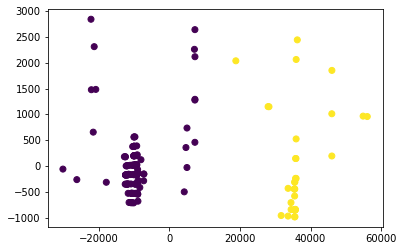

In [27]:
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans.values)



### Comparing the two methods we see nearly 75% overlap which is a good sign 

In [28]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(t, y_kmeans)

In [29]:
np.trace(conf)/sum(sum(conf))

0.7541899441340782

In [30]:
F

,High Freq (Hz),File Offset (s),filename,Maturity Group Method 1,Maturity Group Method 2,duration,mean(audio),var(audio),skewness(audio),kurtosis(audio),...,formant1,formant2,f0max,f0min,f0mean,f0final,pLow,pMid,pHigh,pKur(1)
0,56.126,1184.3480,nn06a_20180716_000000.wav,1,1,3.4840,-0.051808,0.001845,-0.006599,3.138932,...,43.345882,56.961272,20.000000,9.791922,19.170182,19.656020,0.004442,0.002691,0.000550,2.791829
1,61.171,10039.2670,nn06a_20180716_000000.wav,1,1,2.8320,-0.051743,0.001379,-0.005682,3.395646,...,43.386648,56.733240,20.000000,9.815951,19.019854,19.753086,0.005300,0.004031,0.000587,2.956239
2,60.541,10044.9320,nn06a_20180716_000000.wav,0,1,3.0190,-0.051694,0.004293,0.051262,4.152948,...,43.064163,56.041954,20.000000,6.144393,15.103631,20.000000,0.005759,0.002969,0.000559,3.110177
3,49.189,10056.5220,nn06a_20180716_000000.wav,0,1,2.7200,-0.051498,0.008295,0.064557,4.069253,...,43.093952,56.449265,19.851117,4.314995,13.433938,19.851117,0.006053,0.003605,0.000634,3.089233
4,60.541,19851.3540,nn06a_20180716_000000.wav,0,1,2.6650,-0.047950,0.000078,-0.047582,4.727355,...,21.676364,41.995567,20.000000,16.736402,18.882165,17.278618,0.005434,0.005269,0.000578,2.940531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,51.500,51113.7210,nn01a_20180126_000000.wav,0,1,2.9927,-0.047885,0.000068,-0.031334,3.401314,...,21.680393,41.637057,20.000000,19.900498,19.946543,19.950125,0.005636,0.002398,0.000551,2.270880
7,46.500,51117.1570,nn01a_20180126_000000.wav,0,1,3.1034,-0.047954,0.000070,0.147096,4.302986,...,21.955658,42.207716,19.950125,19.900498,19.925888,19.950125,0.005907,0.002094,0.000424,0.726911
8,40.801,51405.6060,nn01a_20180126_000000.wav,0,1,2.4330,-0.047987,0.000077,0.214356,7.123068,...,20.711222,42.236624,20.000000,19.801980,19.902311,19.950125,0.004638,0.002093,0.000568,3.113318
0,34.400,27866.7580,nn06d_20180311_000000.wav,1,1,6.5600,-0.051808,0.001845,-0.006599,3.138932,...,43.345882,56.961272,20.000000,9.791922,19.170182,19.656020,0.004442,0.002691,0.000550,2.791829
